# Загрузка Pandas и очистка данных

In [133]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [111]:
df = pd.read_csv('main_task.xls')

In [93]:
display(df.head(10))
df.info() # Проверяем типы данных в столбцах

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [94]:
# Определим количество пропусков в столбцах
df.isnull().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

In [5]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [6]:
# Удалим ячейки с типом object
df_1 = df.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)
df_1

,Ranking,Rating,Number of Reviews
0,5570.0,3.5,194.0
1,1537.0,4.0,10.0
2,353.0,4.5,688.0
3,3458.0,5.0,3.0
4,621.0,4.0,84.0
...,...,...,...
39995,500.0,4.5,79.0
39996,6341.0,3.5,542.0
39997,1652.0,4.5,4.0
39998,641.0,4.0,70.0


In [7]:
# Смотрим пропуски в новом датафрейме
df_1.isnull().sum()

Ranking                 0
Rating                  0
Number of Reviews    2543
dtype: int64

In [8]:
# Заменяем пропуски на медиану
median = df_1['Number of Reviews'].median()
df_1['Number of Reviews'] = df_1['Number of Reviews'].fillna(median)

In [9]:
# Проверяем пропуски в новом датасете после замены пустых значений
df_1.isna().sum()

Ranking              0
Rating               0
Number of Reviews    0
dtype: int64

In [10]:
# Определяем количество ценовых категорий ресторанов
df['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

In [11]:
# Определяем количество ресторанов из средней ценовой категории
df[df['Price Range'] == '$$ - $$$']['Restaurant_id'].count()

18412

In [12]:
# Определяем количество городов в датафрейме
len(df['City'].unique())

31

In [13]:
# Для работы с типами кухонь на данном этапе заменим пропущенные значения на 'Cuisine'
# Можно было бы удалить на данном этапе строки с пропущенными значениями, но далее по заданию понадобится полное количество строк
df_2 = df
df_2['Cuisine Style'] = df['Cuisine Style'].fillna('Cuisine')

In [14]:
df_2

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,Cuisine,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,Cuisine,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [15]:
# Проверим, что пустых значений не осталось
df_2['Cuisine Style'].isna().sum()

0

In [16]:
# Проверим тип данных в столбце типов кухонь
type(df_2['Cuisine Style'][0])

str

In [17]:
# Выполним преобразование данных
df_2['Cuisine Style'] = df_2['Cuisine Style'].apply(lambda x: x.replace('[',''))
df_2['Cuisine Style'] = df_2['Cuisine Style'].apply(lambda x: x.replace(']',''))
df_2['Cuisine Style'] = df_2['Cuisine Style'].apply(lambda x: x.replace(' ',''))

# Посчитаем количество уникальных типов кухонь
len(set(df_2['Cuisine Style'].str.cat(sep=',').split(',')))-1

125

In [18]:
# Определим название наиболее часто встречающейся кухни
Counter(df_2['Cuisine Style'].str.cat(sep=',').split(',')).most_common(1)

[("'VegetarianFriendly'", 11189)]

In [19]:
df_2.loc['Cuisines List'] = df_2['Cuisine Style'].apply(lambda x: x.split(','))

In [20]:
c = Counter(df_2['Cuisine Style'].str.cat(sep=',').split(','))

In [21]:
# Посчитаем среднее количество кухонь на ресторан
round((sum(c.values())/len(df_2['Restaurant_id'])), 1)

2.6

In [22]:
type(df_2['Reviews'][0])

str

In [32]:
# Создадим словарь уникальных кухонь
cuisines = set(df_2['Cuisine Style'].str.cat(sep=',').split(','))

In [36]:
# Среднее количество отзывов по городу
df_2.groupby(['City'])['Number of Reviews'].mean()

City
Amsterdam     146.630309
Athens         98.538200
Barcelona     132.534747
Berlin         66.522809
Bratislava     53.089147
Brussels       89.090081
Budapest      159.106809
Copenhagen     90.686998
Dublin        155.654147
Edinburgh     232.112263
Geneva         62.316143
Hamburg        46.478809
Helsinki       60.375000
Krakow        120.566265
Lisbon        126.506173
Ljubljana      75.273810
London        137.969490
Luxembourg     82.152284
Lyon           85.955347
Madrid        100.053173
Milan         173.712808
Munich         81.281401
Oporto        135.939331
Oslo           94.931694
Paris         120.146373
Prague        124.028861
Rome          289.243685
Stockholm      77.935356
Vienna         83.792877
Warsaw         64.676380
Zurich         77.558416
Name: Number of Reviews, dtype: float64

In [42]:
df[df['Reviews'] == '[[], []]']['Reviews'].count()

6471

In [112]:
import re
# паттерн для поиска дат
df['Reviews'].fillna('[[], []]', inplace=True)
pattern = re.compile('\'\d+\/\d+\/\d+\'')
dates = df['Reviews'].apply(pattern.findall)
# врeменные признаки
df['date1'] = pd.to_datetime(dates.apply(lambda x: x[0] if len(x) > 0 else None))
df['date2'] = pd.to_datetime(dates.apply(lambda x: x[1] if len(x) > 1 else None))
display(df.loc[:, ['date1', 'date2']].sample(5))

,date1,date2
19198,2017-01-01,2016-09-09
35666,2017-01-29,2016-03-01
36018,NaT,NaT
24220,2017-11-26,2017-11-13
41,2017-10-18,2017-07-29


In [136]:
type(dates)

pandas.core.series.Series

In [48]:
# Найдем максимальное количество дней между отзывами для ресторанов
(df['date1']-df['date2']).max()

Timedelta('3207 days 00:00:00')

In [50]:
# Найдем дату самого свежего отзыва
df[['date1', 'date2']].max()

date1   2018-02-26
date2   2018-02-26
dtype: datetime64[ns]

In [113]:
from datetime import datetime
def days_since_last_review(r):
    '''
    Считает количество дней с последней даты ревью данной записи
    датасета. Учитывает отсутствие одной из дат и пропуск (возвращает
    0 в последнем случае)
    '''
    datetime_now = datetime.now();
    if pd.notna(r.date1) and pd.notna(r.date2):
        if r.date1 > r.date2:
            return (datetime_now - r.date1).days
        else:
            return (datetime_now - r.date2).days
    else:
        if pd.notna(r.date1):
            return (datetime_now - r.date1).days
        if pd.notna(r.date2):
            return (datetime_now - r.date2).days        
    return 0 

def reviews_days_delta(r):
    '''
    Возвращает количество дней между двумя датами ревью в данной записи
    датасета. Учитывает отсутствие (одной из) дат - возвращает 0 в данном
    случае.
    '''
    if pd.notna(r.date1) and pd.notna(r.date2):
        return abs((r.date1 - r.date2).days)
    else:
        return 0
# новые признаки на основе дат последних ревью: количество дней между
# двумя последними ревью и количество дней со времени последнего ревью
df['Reviews Days Delta'] = df.apply(lambda row: reviews_days_delta(row), axis=1)
df['Reviews Days Since'] = df.apply(lambda row: days_since_last_review(row), axis=1)
# удаляем временные признаки
df.drop(['date1', 'date2'], inplace=True, axis=1)

In [53]:
df['Reviews Days Delta'].max()

3207

In [114]:
median = df['Number of Reviews'].median()
df['Number of Reviews'] = df['Number of Reviews'].fillna(median)

In [115]:
#население территории города (metro area) - источник: wiki
city_population = {'Paris':13024, 'Stockholm':2391, 'London':14257, 
                   'Berlin':6144, 'Munich':5991, 'Oporto':1721,
                   'Milan':4336, 'Bratislava':659, 'Vienna':2600, 
                   'Rome':4342, 'Barcelona':5474, 'Madrid':6791,
                   'Dublin':1417, 'Brussels':2500, 'Zurich':415, 
                   'Warsaw':3100, 'Budapest':3011, 'Copenhagen':2057,
                   'Amsterdam':2480, 'Lyon':2323, 'Hamburg':5107, 
                   'Lisbon':2827, 'Prague':2677, 'Oslo':1588,
                   'Helsinki':1525, 'Edinburgh':901, 'Geneva':201, 
                   'Ljubljana':537, 'Athens':2928,'Luxembourg':633, 
                   'Krakow':1752}

#количество ресторанов в городе - источник: датасет
rest_per_city = df.City.value_counts().to_dict()

df['Ranking To Rest Num'] = df.apply(lambda r: (r['Ranking'] / rest_per_city[r.City]), axis=1)
df['Ranking To Population'] = df.apply(lambda r: (r['Ranking'] / city_population[r.City]), axis=1)
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Reviews Days Delta,Reviews Days Since,Ranking To Rest Num,Ranking To Population
37329,id_741,Budapest,"['Bar', 'European', 'Pub', 'Central European',...",742.0,4.0,$$ - $$$,111.0,"[['Good food', 'Vegetarian Food.'], ['05/06/20...",/Restaurant_Review-g274887-d3531029-Reviews-Pi...,d3531029,79,1447,0.909314,0.246430
23798,id_278,Copenhagen,"['European', 'Scandinavian', 'Danish', 'Vegeta...",279.0,4.0,$$$$,434.0,"[['Different but great', 'Good food and servic...",/Restaurant_Review-g189541-d4258984-Reviews-Re...,d4258984,57,1207,0.423369,0.135634
15590,id_6056,Barcelona,['European'],6057.0,4.0,NaN,26.0,"[[], []]",/Restaurant_Review-g187497-d4479230-Reviews-Fe...,d4479230,0,0,2.215435,1.106503
24749,id_3149,Lisbon,"['Portuguese', 'Bar', 'Mediterranean', 'Europe...",3152.0,3.5,$$ - $$$,36.0,"[['Strange experience!', 'Recommended'], ['10/...",/Restaurant_Review-g189158-d5959849-Reviews-Tu...,d5959849,70,1279,2.424615,1.114963
4964,id_512,Munich,"['German', 'European', 'Central European']",516.0,4.5,$$ - $$$,58.0,"[['Great little gem', 'Good food but crowded']...",/Restaurant_Review-g187309-d1994692-Reviews-Wi...,d1994692,210,1406,0.577828,0.086129


In [119]:
df['Rest per city'] = df.apply(lambda x: rest_per_city[x.City], axis = 1)

In [120]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Reviews Days Delta,Reviews Days Since,Ranking To Rest Num,Ranking To Population,Rest per city
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,41,1208,1.137431,0.427672,4897
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,382,1386,1.874390,0.642827,820
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,2,1200,0.061317,0.024760,5757
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,1.604640,0.562826,2155
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,272,1251,0.695409,0.103655,893


In [121]:
rest_per_city

{'London': 5757,
 'Paris': 4897,
 'Madrid': 3108,
 'Barcelona': 2734,
 'Berlin': 2155,
 'Milan': 2133,
 'Rome': 2078,
 'Prague': 1443,
 'Lisbon': 1300,
 'Vienna': 1166,
 'Amsterdam': 1086,
 'Brussels': 1060,
 'Hamburg': 949,
 'Munich': 893,
 'Lyon': 892,
 'Stockholm': 820,
 'Budapest': 816,
 'Warsaw': 727,
 'Dublin': 673,
 'Copenhagen': 659,
 'Athens': 628,
 'Edinburgh': 596,
 'Zurich': 538,
 'Oporto': 513,
 'Geneva': 481,
 'Krakow': 443,
 'Oslo': 385,
 'Helsinki': 376,
 'Bratislava': 301,
 'Luxembourg': 210,
 'Ljubljana': 183}

In [122]:
df['Reviews Num To Population'] = df.apply(lambda r: (r['Number of Reviews'] / city_population[r.City]), axis=1)

In [123]:
df['Population'] = df.City.apply(lambda x: (city_population[x]))

In [124]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA',
       'Reviews Days Delta', 'Reviews Days Since', 'Ranking To Rest Num',
       'Ranking To Population', 'Rest per city', 'Reviews Num To Population',
       'Population'],
      dtype='object')

In [125]:
df = df.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)

In [126]:
df.isna().sum()

Ranking                      0
Rating                       0
Number of Reviews            0
Reviews Days Delta           0
Reviews Days Since           0
Ranking To Rest Num          0
Ranking To Population        0
Rest per city                0
Reviews Num To Population    0
Population                   0
dtype: int64

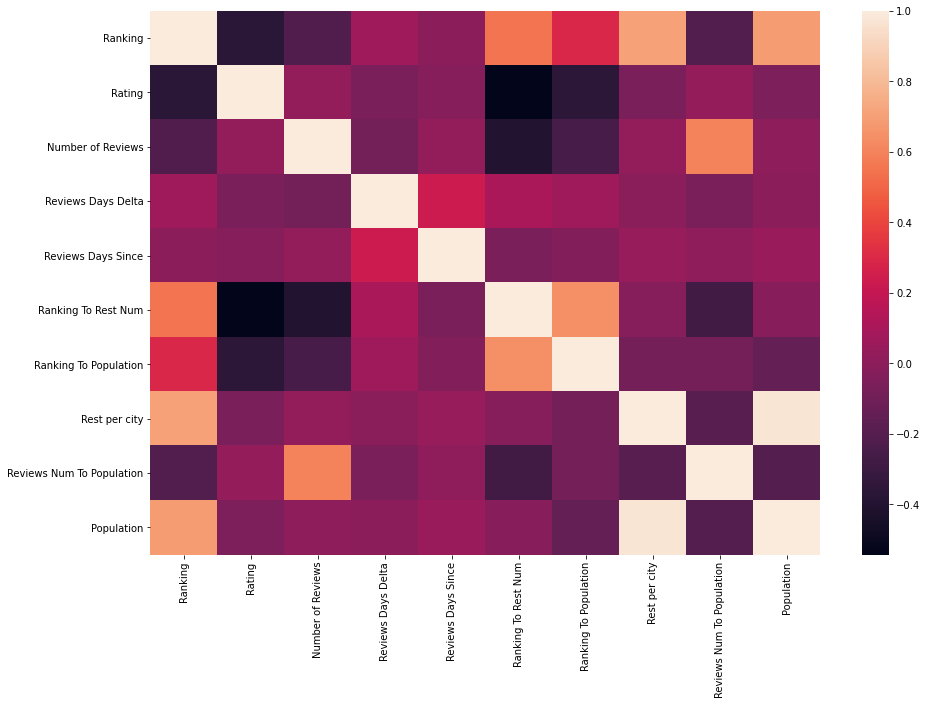

In [135]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.corr())

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [127]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
#X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [128]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [129]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [130]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [131]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [132]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21024449999999997
